In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  
from scipy import stats

import pickle  
from prettytable import PrettyTable  

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import auc, f1_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict

the data from the CSV files are loaded into the train and test DataFrames

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/PPP/IDS_DATASET/train_alldata_EDA.csv')
test = pd.read_csv('/content/drive/MyDrive/PPP/IDS_DATASET/test_alldata_EDA.csv')

the normal DataFrame will contain the rows with normal data, and the anomaly DataFrame will contain the rows with anomalous data, allowing separate analysis and processing of these two categories of data.

In [ ]:
normal=train[train["label"]==0]
anomaly=train[train["label"]==1]

By calling this function with appropriate column names, we can obtain the correlation and log correlation between the specified columns in the given DataFrame.

In [ ]:
def multi_corr(col1, col2="label", df=train):
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])

    print("Correlation : {}\nlog_Correlation: {}".format(corr, log_corr))

In [ ]:
    """
    Calculate correlation between two columns in a DataFrame.

    Parameters:
        col1 (str): Name of the first column.
        col2 (str): Name of the second column. Default is "label".
        df (DataFrame): DataFrame to use for correlation calculation. Default is train DataFrame.

    Returns:
        float: The correlation between the two columns.

    """
def corr(col1, col2="label", df=train):
    return df[[col1, col2]].corr().iloc[0,1]

By running this, we can visualize the correlation matrix of the train DataFrame as a heatmap, enabling us to analyze the relationships between different variables.

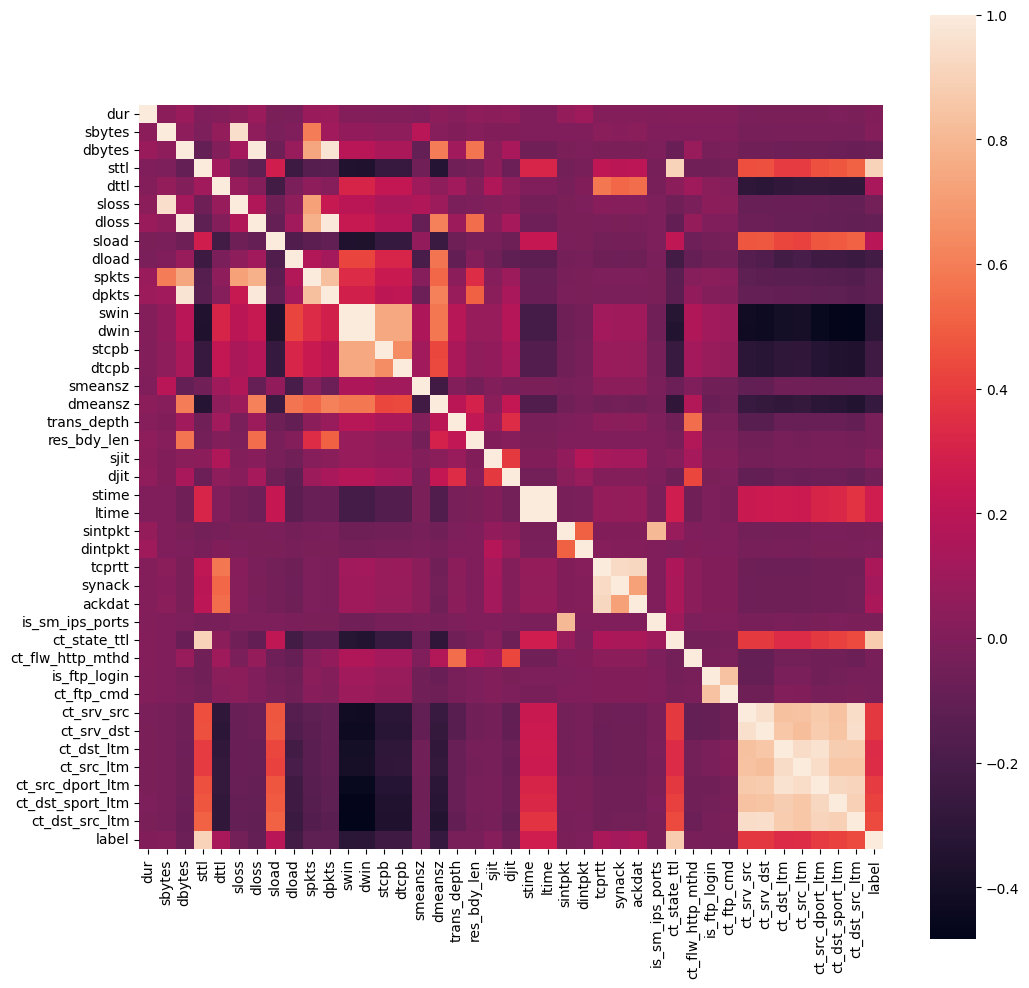

In [ ]:
method = "pearson"
corr_mat = train.corr(method=method)

plt.figure(figsize=(12,12)) 
sns.heatmap(corr_mat, square=True)
plt.show()

We aim to identify highly correlated variables in the correlation matrix and print them along with their correlation coefficients.


Correlation Limit Threshold: We set the variable limit to the desired correlation threshold. Any correlation coefficient equal to or above this threshold will be considered as highly correlated.


Column Retrieval: We retrieve the column names from the correlation matrix using the columns attribute.


Finding Highly Correlated Variables: We iterate through the correlation matrix using nested loops. We check if the correlation coefficient between the variables at indices (i, j) is equal to or above the specified limit. If so, we print the names of the correlated variables along with their correlation coefficient.

In [ ]:
limit = 0.9
columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")

sbytes               sloss                0.9515464133660682
dbytes               dloss                0.9912941785427634
dbytes               dpkts                0.9705744719061106
sttl                 ct_state_ttl         0.9058027624589845
sttl                 label                0.9043459910087561
dloss                dpkts                0.9921743916746946
swin                 dwin                 0.9971933359586712
stime                ltime                0.9999999998073185
tcprtt               synack               0.9332414134584021
tcprtt               ackdat               0.9202047490089745
ct_srv_src           ct_srv_dst           0.956721026945663
ct_srv_src           ct_dst_src_ltm       0.942148711061324
ct_srv_dst           ct_dst_src_ltm       0.9510250540010916
ct_dst_ltm           ct_src_ltm           0.9384612565049639
ct_dst_ltm           ct_src_dport_ltm     0.9601144948755526
ct_src_ltm           ct_src_dport_ltm     0.9453045008443021
ct_src_dport_ltm     ct_ds

We aim to create a pair plot to visualize the relationship between the variables 'sbytes' and 'sloss' in the train DataFrame.


Setting Plot Style: We set the style of the plot to "whitegrid" using the sns.set_style function. This style adds horizontal gridlines to the plot.


Creating Pair Plot: We create a pair plot using the sns.pairplot function. We pass the train DataFrame as the data parameter and select the variables 'sbytes' and 'sloss' using the vars parameter.


Display: We display the pair plot using the plt.show() function.

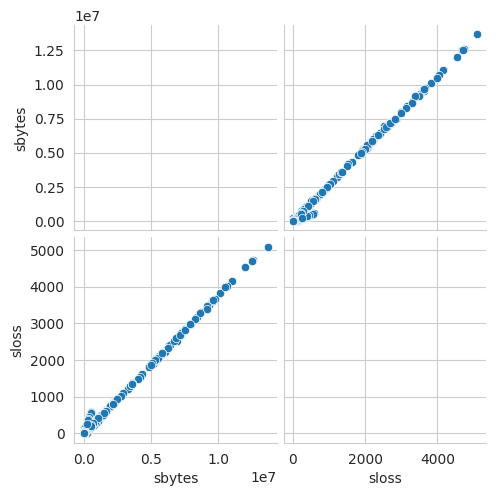

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data=train, vars=['sbytes', 'sloss'])
plt.show()

We create a pair plot to visualize the relationship between the variables 'dpkts', 'dbytes', and 'dloss' in the train DataFrame.

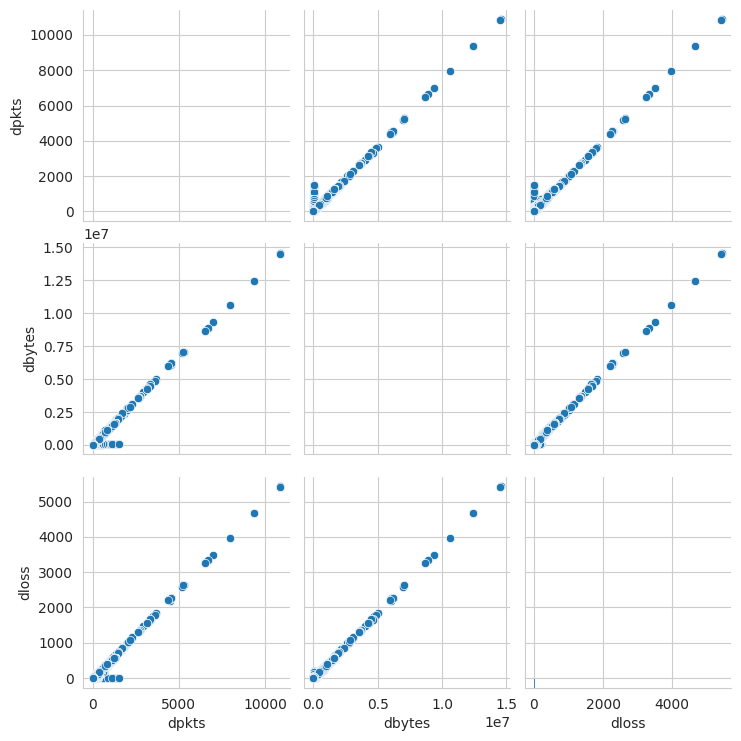

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=['dpkts', 'dbytes', 'dloss'])
plt.show()

We create a pair plot to visualize the relationship between the variables 'sttl', 'ct_state_ttl', and 'label' in the train DataFrame.

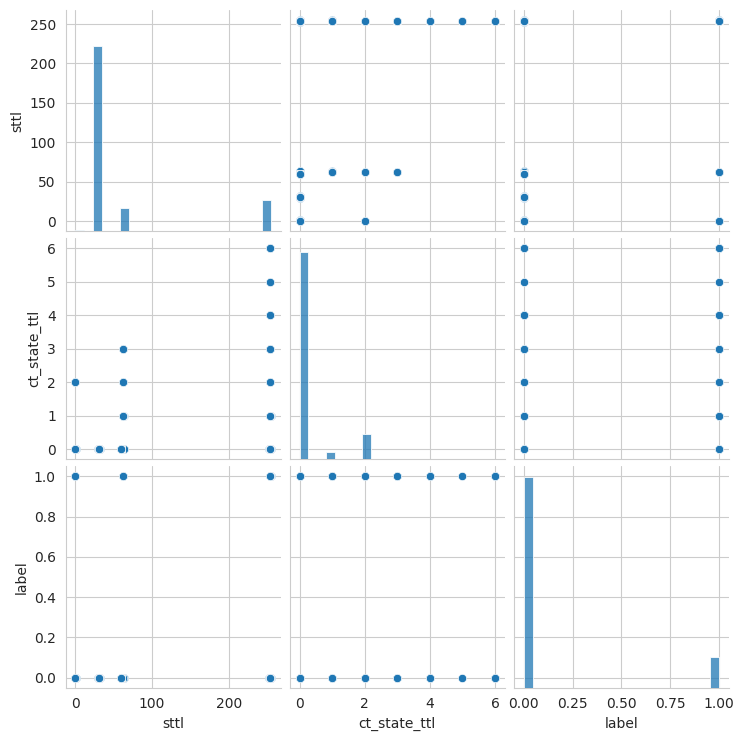

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=['sttl', 'ct_state_ttl', 'label'])
plt.show()

We create a pair plot to visualize the relationship between the variables 'swin' and 'dwin' in the train DataFrame.

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=['swin', 'dwin'])
plt.show()

We create a pair plot to visualize the relationship between the variables 'tcprtt', 'synack', and 'ackdat' in the train DataFrame.

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=['tcprtt', 'synack', 'ackdat'])
plt.show()

we visualize the relationship between the 'ct_srv_src', 'ct_srv_dst', and 'ct_dst_src_ltm' variables in the train DataFrame.

In [ ]:
sns.pairplot(train, vars=['ct_srv_src', 'ct_srv_dst', 'ct_dst_src_ltm'])
plt.show()

we visualize the relationship between the 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', and 'ct_dst_sport_ltm' variables in the train DataFrame

In [ ]:
sns.pairplot(train, vars=['ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm'])
plt.show()

We define a function called col_countplot that plots a countplot of a specified column in the train_data DataFrame.

In [ ]:
def col_countplot(col, train_data=train):
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    # countplot of the given column
    ax = sns.countplot(x=col, hue='label', data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()

We define a function called dual_plot that compares the distributions of a specified column in two datasets using a dual plot.

In [ ]:
def dual_plot(col, data1=normal, data2=anomaly, label1='normal', label2='anomaly', method=None):
    if method != None:
        sns.set_style('whitegrid')
        sns.distplot(data1[col].apply(method), label=label1, hist=False, rug=True)
        sns.distplot(data2[col].apply(method), label=label2, hist=False, rug=True)
    else:
        sns.set_style('whitegrid')
        sns.distplot(data1[col], label=label1, hist=False, rug=True)
        sns.distplot(data2[col], label=label2, hist=False, rug=True)
    plt.legend()

We define a function called reduce_column that reduces the values of a specified column based on a given list of values to keep.

In [ ]:
def reduce_column(s, to_keep):
    s = s.lower().strip()
    if s not in to_keep:
        return "others"
    else:
        return s

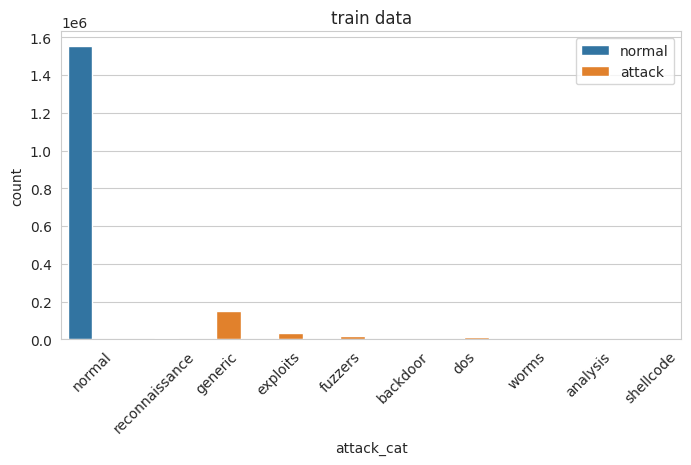

In [ ]:
col_countplot('attack_cat')

In [ ]:
train['proto'].nunique()

135

In [ ]:
normal['proto'].nunique(), anomaly['proto'].nunique()

(9, 129)

In [ ]:
train['proto'].value_counts().head(10)*100/train.shape[0]

tcp     58.858108
udp     38.983550
unas     0.639640
arp      0.397631
ospf     0.306800
sctp     0.061810
icmp     0.020303
any      0.015916
gre      0.013104
ipv6     0.011642
Name: proto, dtype: float64

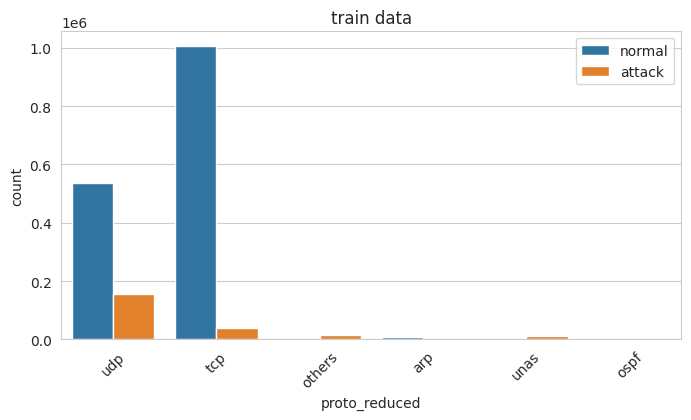

In [ ]:
col_countplot('proto_reduced')

In [ ]:
train['service'].nunique()

13

In [ ]:
train['service'].value_counts()

None        872286
dns         547094
http        144555
ftp-data     88310
smtp         57160
ftp          34293
ssh          32897
pop3          1076
dhcp           124
ssl            109
snmp            81
radius          27
irc             20
Name: service, dtype: int64

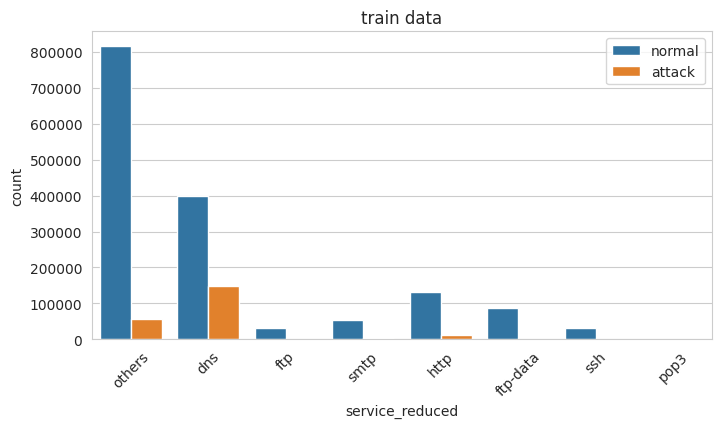

In [ ]:
col_countplot('service_reduced')

In [ ]:
train['state'].nunique()

16

In [ ]:
train['state'].value_counts()

FIN    1034981
CON     392422
INT     343397
REQ       6361
RST        368
ECO        227
CLO        108
URH         78
ACC         34
PAR         20
TST          8
URN          7
ECR          7
no           6
TXD          4
MAS          4
Name: state, dtype: int64

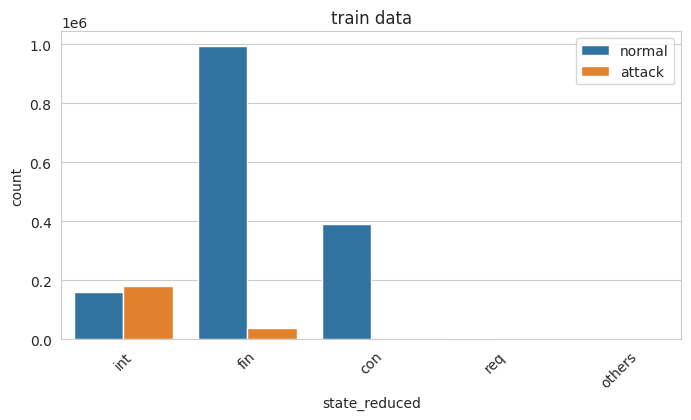

In [ ]:
col_countplot('state_reduced')

In [ ]:
col = 'ct_dst_ltm'
train[col].nunique()

62

This code provides visualizations of the distributions of the 'ct_dst_ltm' column in the train dataset. The left subplot shows the original distribution, while the right subplot shows the distribution with a log transformation applied. The dual_plot function is used to overlay the distributions of the normal and anomaly data, allowing for a visual comparison.

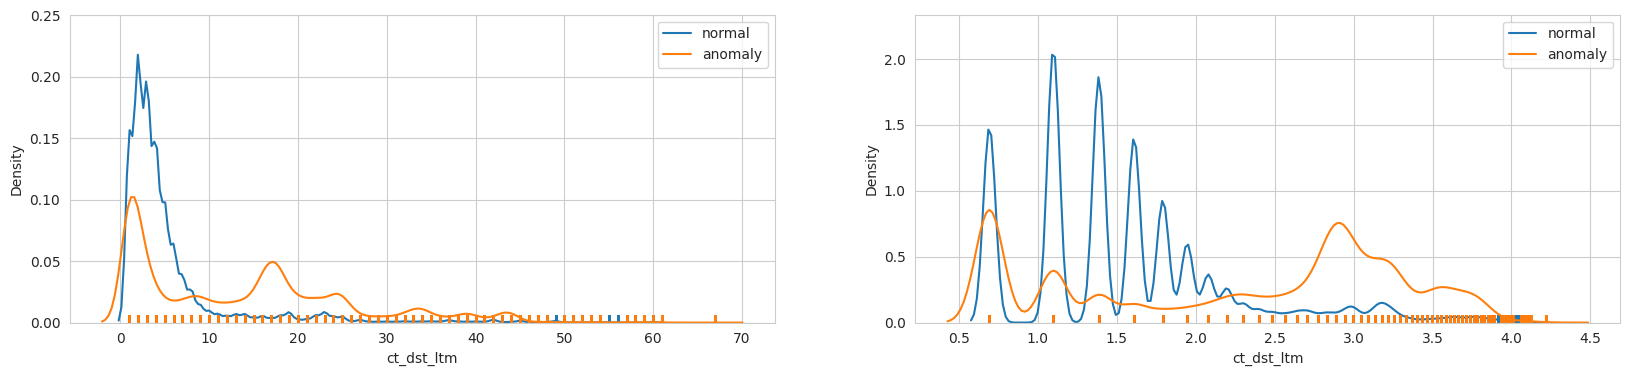

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
train['ct_flw_http_mthd'].nunique()

In [ ]:
col_countplot('ct_flw_http_mthd')

In [ ]:
col = 'ct_srv_src'
train[col].nunique()

This code provides visualizations of the distributions of the 'ct_dst_ltm' column. The left subplot shows the original distribution, while the right subplot shows the distribution with a log transformation applied. The dual_plot function is used to overlay the distributions of the normal and anomaly data, allowing for a visual comparison.

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
train['ct_state_ttl'].nunique()

In [ ]:
col_countplot('ct_state_ttl')

In [ ]:
train['ct_dst_sport_ltm'].nunique()

In [ ]:
col_countplot('ct_dst_sport_ltm')

In [ ]:
train['dintpkt'].nunique()

This code provides visualizations of the distributions of the 'dintpkt' column. The left subplot shows the original distribution, while the right subplot shows the distribution with a log transformation applied. The dual_plot function is used to overlay the distributions of the normal and anomaly data, allowing for a visual comparison.

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('dintpkt')
plt.subplot(122)
dual_plot('dintpkt', method=np.log1p)
plt.show()

In [ ]:
train['djit'].nunique()

This code provides visualizations of the distributions of the 'djit' column. The left subplot shows the original distribution, while the right subplot shows the distribution with a log transformation applied. The dual_plot function is used to overlay the distributions of the normal and anomaly data, allowing for a visual comparison.

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('djit')
plt.subplot(122)
dual_plot('djit', method=np.log1p)
plt.show()

In [ ]:
train['dload'].nunique()

This code provides visualizations of the distributions of the 'dload' column. The left subplot shows the original distribution, while the right subplot shows the distribution with a log transformation applied. The dual_plot function is used to overlay the distributions of the normal and anomaly data, allowing for a visual comparison.

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('dload')
plt.subplot(122)
dual_plot('dload', method=np.log1p)
plt.show()

In [ ]:
col = 'dbytes'
train[col].nunique()

This code provides visualizations of the distributions of the 'dbytes' column. The left subplot shows the original distribution, while the right subplot shows the distribution with a log transformation applied. The dual_plot function is used to overlay the distributions of the normal and anomaly data, allowing for a visual comparison.



In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
col = 'dmeansz'
train[col].nunique()

The code generates visualizations of the distributions of the 'dmeansz' column. The left subplot shows the original distribution, while the right subplot shows the distribution with a log transformation applied. The dual_plot function is used to overlay the distributions of the normal and anomaly data, allowing for a visual comparison.

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
col = 'dpkts'
train[col].nunique()

The code generates visualizations of the distributions of the 'dpkts' column. The left subplot shows the original distribution, while the right subplot shows the distribution with a log transformation applied. The dual_plot function is used to overlay the distributions of the normal and anomaly data, allowing for a visual comparison.

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
col="dtcp"
train[col].nunique

The code generates visualizations of the distributions of the 'dtcp' column. The left subplot shows the original distribution, while the right subplot shows the distribution with a log transformation applied. The dual_plot function is used to overlay the distributions of the normal and anomaly data, allowing for a visual comparison.

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
col="dttl"
train[col].nunique

In [ ]:
col_countplot("dttl")

In [ ]:
col="dur"
train[col].nunique()

The code generates visualizations of the distributions of the 'dur' column. The left subplot shows the original distribution, while the right subplot shows the distribution with a log transformation applied. The dual_plot function is used to overlay the distributions of the normal and anomaly data, allowing for a visual comparison.

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
train['sintpkt'].nunique()

The code generates visualizations of the distributions of the 'sintpkt' column. The left subplot shows the original distribution, while the right subplot shows the distribution with a log transformation applied. The dual_plot function is used to overlay the distributions of the normal and anomaly data, allowing for a visual comparison.

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('sintpkt')
plt.subplot(122)
dual_plot('sintpkt', method=np.log1p)
plt.show()

In [ ]:
train['sttl'].nunique()

In [ ]:
col_countplot("sttl")

In [ ]:
col = 'stcpb'
train[col].nunique()

The code generates visualizations of the distributions of the 'stcpb' column. The left subplot shows the original distribution, while the right subplot shows the distribution with a log transformation applied. The dual_plot function is used to overlay the distributions of the normal and anomaly data, allowing for a visual comparison.

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
train['swin'].nunique()

In [ ]:
col_countplot('swin')

In [ ]:
col = 'sbytes'
train[col].nunique()

The code generates visualizations of the distributions of the 'sbytes' column. The left subplot shows the original distribution, while the right subplot shows the distribution with a log transformation applied. The dual_plot function is used to overlay the distributions of the normal and anomaly data, allowing for a visual comparison.

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()